# Credit Scorecard Risk Anlaysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('default of credit card clients.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Wrangling 

In [3]:
# 1) Check Missing
df.describe() # Check stat -> Because count of each col = 30000 => No missing

# 2) Check data type
df.info()

# 3) Change below column to float
df["LIMIT_BAL"] = pd.to_numeric(df["LIMIT_BAL"], downcast="float")
df["BILL_AMT1"] = pd.to_numeric(df["BILL_AMT1"], downcast="float")
df["BILL_AMT2"] = pd.to_numeric(df["BILL_AMT2"], downcast="float")
df["BILL_AMT3"] = pd.to_numeric(df["BILL_AMT3"], downcast="float")
df["BILL_AMT4"] = pd.to_numeric(df["BILL_AMT4"], downcast="float")
df["BILL_AMT5"] = pd.to_numeric(df["BILL_AMT5"], downcast="float")
df["BILL_AMT6"] = pd.to_numeric(df["BILL_AMT6"], downcast="float")
df["PAY_AMT1"] = pd.to_numeric(df["PAY_AMT1"], downcast="float")
df["PAY_AMT2"] = pd.to_numeric(df["PAY_AMT2"], downcast="float")
df["PAY_AMT3"] = pd.to_numeric(df["PAY_AMT3"], downcast="float")
df["PAY_AMT4"] = pd.to_numeric(df["PAY_AMT4"], downcast="float")
df["PAY_AMT5"] = pd.to_numeric(df["PAY_AMT5"], downcast="float")
df["PAY_AMT6"] = pd.to_numeric(df["PAY_AMT6"], downcast="float")

# 4) Reconfirm changed data type
df.info()

# 5) Change column name
df.rename(columns={'PAY_0':'PAY_1'},inplace=True) # Replace 'PAY_0' with 'PAY_1'


# 6) Create extra columns to group 'BILL_AMT' & 'PAY_AMT'
df['Bill_total']=df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['PAY_AMT_total']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

# 7) Cheack dataframe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Exploratory data analysis 

### 1) Distribution 

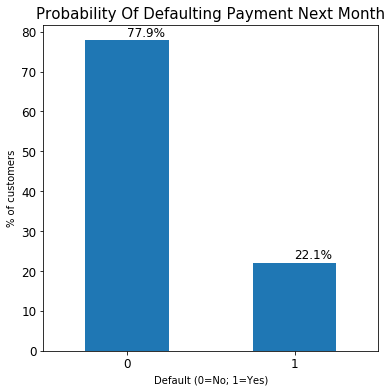

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


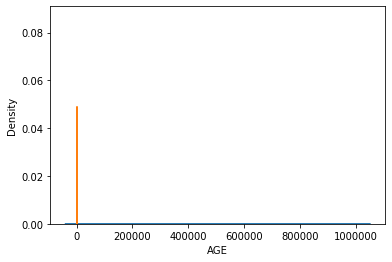

In [7]:
# Default
def_cnt = (df['default payment next month'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.xlabel('Default (0=No; 1=Yes)')
plt.ylabel('% of customers')
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y+1,str(round(y,1))+'%',fontsize=12)
plt.show()

# Limit balance
sns.distplot(df['LIMIT_BAL'])

# Age
sns.distplot(df['AGE'])

### 2) Proportion  of default in terms of: 

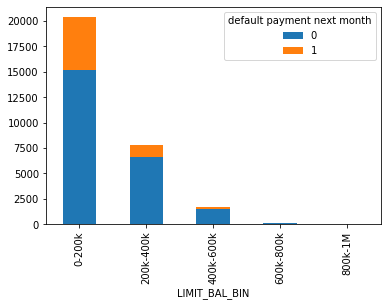

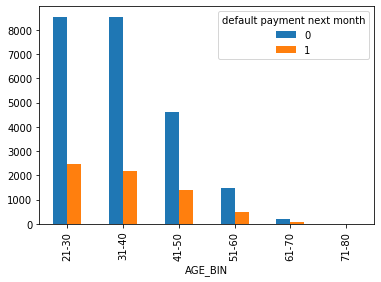

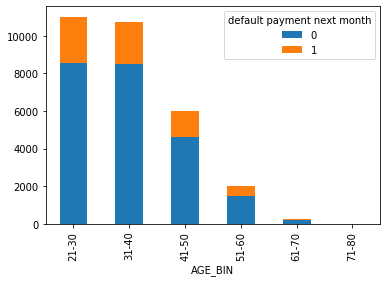

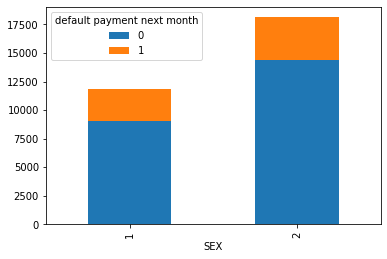

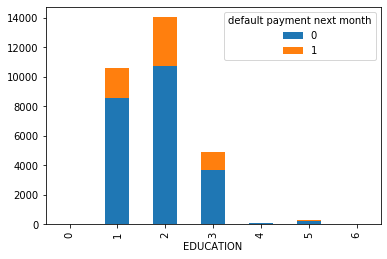

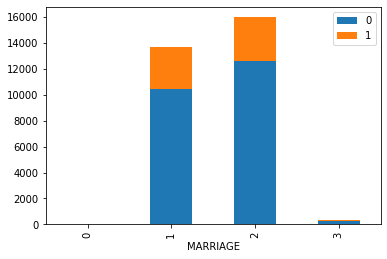

In [8]:
# Limit_balance
bins = [0,200000,400000,600000,800000,1000000]
names = ['0-200k','200k-400k','400k-600k','600k-800k','800k-1M']
df['LIMIT_BAL_BIN'] = pd.cut(x=df['LIMIT_BAL'], bins=bins, labels=names, right=True)
df.head()
pro_lbal=df.groupby(['LIMIT_BAL_BIN','default payment next month']).count().ID.unstack()
pro_lbal.plot(kind='bar',stacked=True)

# age
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)
df.head()
trail=df.groupby(['AGE_BIN','default payment next month']).count().ID.unstack()
trail.plot(kind='bar')
trail.plot(kind='bar',stacked=True)

# Sex
pro_sex=df.groupby(['SEX','default payment next month']).count().ID.unstack()
pro_sex.plot(kind='bar',stacked=True)

# Education
pro_ed=df.groupby(['EDUCATION','default payment next month']).count().ID.unstack()
pro_ed.plot(kind='bar',stacked=True)

# Marriage
pro_mar=df.groupby(['MARRIAGE','default payment next month']).count().ID.unstack()
pro_mar.plot(kind='bar',stacked=True).legend(loc='best')

# Bill_AMT_total
bins = [-10000,-5000,0,5000,50000,100000,150000,200000,300000,400000,500000,1100000]
names = ['(-10000, -5000]','(-5000, 0]','(0, 5000]','(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']
df['Bill_total_BIN'] = pd.cut(x=df['Bill_total'], bins=bins, labels=names, right=True)
gb_bill=df.groupby(['Bill_total_BIN','default payment next month']).count().ID.unstack()
gb_bill.plot(kind='bar',stacked=True)

# PAY_AMT_total_total
bins = [0, 25000, 50000, 100000, 2000000]
names = ['(0, 25000]','(25000, 50000]','(50000, 100000]','(100000, 2000000]']
df['PAY_AMT_total_BIN'] = pd.cut(x=df['PAY_AMT_total'], bins=bins, labels=names, right=True)
gb_pay=df.groupby(['PAY_AMT_total_BIN','default payment next month']).count().ID.unstack()
gb_pay.plot(kind='bar',stacked=True)

#### Repayment history

Text(0.5, 0.08, 'Repayment Status for last 6 months with proportion of defaulting payment next month')

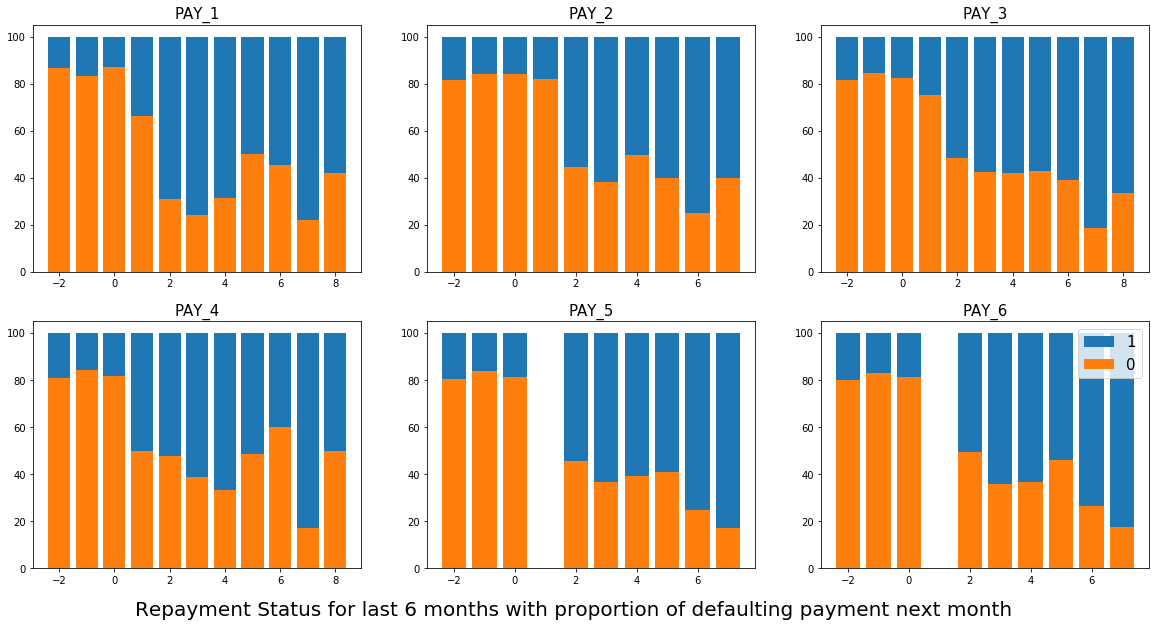

In [12]:
plt.subplots(figsize=(20,10))

########################### Pay_1 ##################################
p_1=df.groupby(['PAY_1','default payment next month']).count().ID.unstack().reset_index()
ind = sorted(p_1['PAY_1'].unique())
p_1['total']=p_1[0]+p_1[1]
# Cal proportion
pay_0_prop = np.true_divide(p_1[0], p_1['total'])*100
pay_1_prop = np.true_divide(p_1[1], p_1['total'])*100
pay_0_prop
# Plot
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("PAY_1", fontsize=15)

########################### Pay_2 ##################################
p_2=df.groupby(['PAY_2','default payment next month']).count().ID.unstack().reset_index()
ind = sorted(p_2['PAY_2'].unique())
p_2['total']=p_2[0]+p_2[1]
# Cal proportion
pay_0_2prop = np.true_divide(p_2[0], p_2['total'])*100
pay_1_2prop = np.true_divide(p_2[1], p_2['total'])*100
# Plot
plt.subplot(232)
plt.bar(ind, pay_1_2prop, bottom=pay_0_2prop, label='1')
plt.bar(ind, pay_0_2prop, label='0')
plt.title("PAY_2", fontsize=15)

########################### Pay_3-6 ##################################
for n in range(3,7):
    p_n=df.groupby(['PAY_'+str(n),'default payment next month']).count().ID.unstack().reset_index()
    ind = sorted(p_n['PAY_'+str(n)].unique())
    p_n['total']=p_n[0]+p_n[1]
    # Cal proportion
    pay_0_prop = np.true_divide(p_n[0], p_n['total'])*100
    pay_1_prop = np.true_divide(p_n[1], p_n['total'])*100
    # Plot
    plt.subplot(230+n)
    plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
    plt.bar(ind, pay_0_prop, label='0')
    plt.title('PAY_'+str(n), fontsize=15)

plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20,y=0.08)


### 3) Correlation analysis

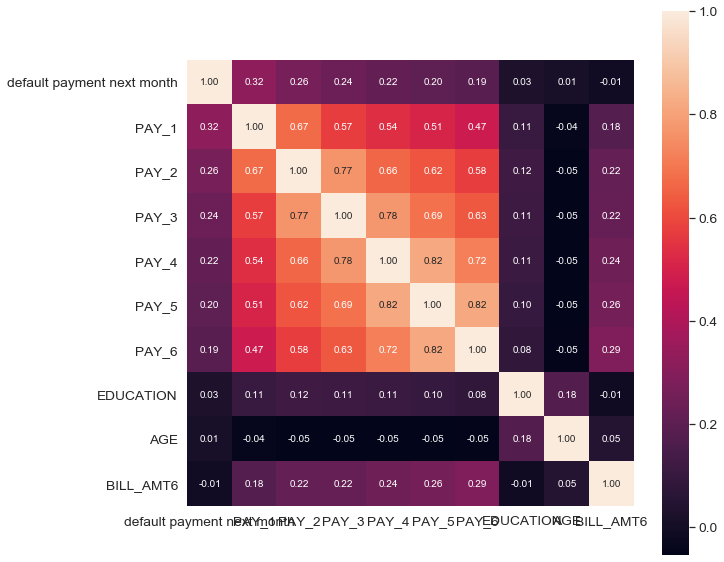

In [13]:
# Top 10 variables
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'default payment next month')['default payment next month'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.xticks(rotation=0)
plt.show()


## Methodology

In [4]:
import random
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split,cross_val_predict, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc, roc_auc_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.feature_selection import RFE

In [22]:
# Remove created columns in EDA 
df.drop(columns=['Bill_total','PAY_AMT_total','Bill_total_BIN','PAY_AMT_total_BIN'],inplace=True)

# Cheack dataframe
df.head()

### Train Test Split 

In [6]:
x=df.iloc[:,1:-1] # Remove ID and Y variable
y=df.loc[:,df.columns=='default payment next month'].squeeze()
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=19)

In [7]:
# Scaling of Data
scaler = StandardScaler()
scaler_fit=scaler.fit(X_train)

scaled_x_train=pd.DataFrame(scaler_fit.transform(X_train))
scaled_x_test=pd.DataFrame(scaler_fit.transform(X_test))

### ------------------------------------------------------ 1) Logistics Regression ---------------------------------------------------------------

#### 1.1) Without CV

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5564
           1       0.24      0.71      0.35       436

    accuracy                           0.81      6000
   macro avg       0.60      0.77      0.62      6000
weighted avg       0.92      0.81      0.85      6000

[[4558 1006]
 [ 126  310]]

Accuracy Score for Logistics Regression(without CV):  0.8113333333333334

Testing MSE for Logistics Regression(without CV):  0.18866666666666668


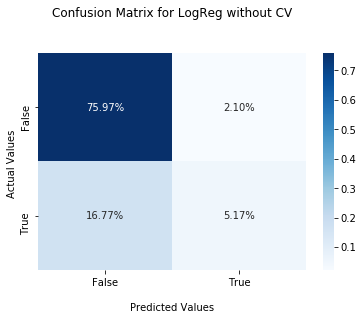

No Predictive value: ROC AUC=0.500
Logistic without CV: ROC AUC=0.726


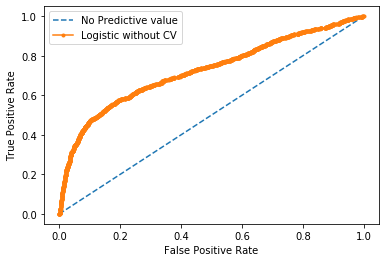

In [20]:
## Building model
logreg = LogisticRegression()
logreg_fit=logreg.fit(scaled_x_train, y_train)
y_pred = logreg_fit.predict(scaled_x_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for Logistics Regression(without CV): ', accuracy_score(y_test,y_pred))
print('\nTesting MSE for Logistics Regression(without CV): ', mean_squared_error(y_test,y_pred))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for LogReg without CV\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg_fit.predict_proba(scaled_x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Logistic without CV: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic without CV')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### 1.2) With 10-fold CV 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4684
           1       0.69      0.25      0.37      1316

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.63      6000
weighted avg       0.79      0.81      0.77      6000

[[4540  989]
 [ 144  327]]

Accuracy Score for Logistics Regression (with CV):  0.8111666666666667

Testing MSE for Logistics Regression (with CV):  0.18883333333333333


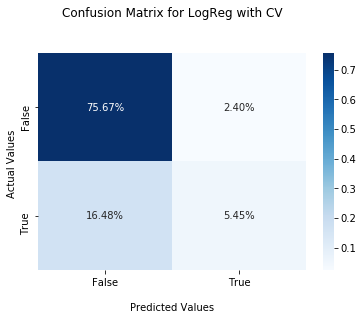

No Predictive value: ROC AUC=0.500
Logistic with CV: ROC AUC=0.721


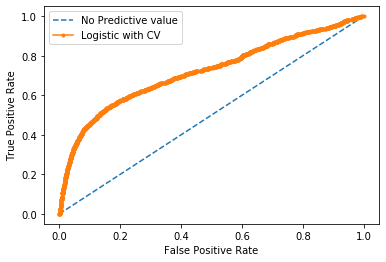

In [13]:
## Building model
logreg = LogisticRegression()
logreg_fit=logreg.fit(scaled_x_train, y_train)
predicted = cross_val_predict(logreg,scaled_x_test, y_test, cv=10)
print(classification_report(y_test, predicted))
print(confusion_matrix(predicted, y_test))
print('\nAccuracy Score for Logistics Regression (with CV): ',accuracy_score(y_test, predicted)) # testing
print('\nTesting MSE for Logistics Regression (with CV): ', mean_squared_error(y_test,predicted))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,predicted)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for LogReg with CV\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC 
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = cross_val_predict(logreg,scaled_x_test, y_test, cv=10,method='predict_proba')
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Logistic with CV: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic with CV')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### ------------------------------------------------------ Feature selction -------------------------------------------------------

In [48]:
features=list(df.columns)[1:-1]
features

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [44]:
NUM_FEATURES = 3
rfe_stand = RFE(logreg_fit, NUM_FEATURES)
fit_stand = rfe_stand.fit(scaled_x_train, y_train)
print("Std Model Feature Ranking:", fit_stand.ranking_)

# calculate the score for the selected features
score_stand = rfe_stand.score(scaled_x_train,y_train)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))
feature_names = np.array(features)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Std Model Feature Ranking: [ 6 13  9 10  7  1  8  4 12 19 18  1  5  2 21 15 14  3  1 17 16 20 11]
Standardized Model Score with selected features is: 0.811583 (0.000000)
Most important features (RFE): ['PAY_1' 'BILL_AMT1' 'PAY_AMT2']


In [27]:
selected=feature_names[rfe_stand.support_] # Visualise???
selected

array(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2'], dtype='<U9')

In [18]:
new_X_train=X_train[selected]
new_X_test=X_test[selected]
new_X_test.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2
23792,50000.0,58,0,0,0,50182.0,41207.0,19129.0,1500.0,1700.0
2827,150000.0,57,-1,-1,-1,5483.0,9136.0,17348.0,9136.0,17348.0
9358,450000.0,28,-1,0,0,9845.0,11991.0,17111.0,3000.0,10000.0
10747,310000.0,32,0,0,0,172772.0,152397.0,110375.0,8295.0,6000.0
10486,200000.0,41,1,-2,-2,0.0,0.0,0.0,0.0,0.0


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4684
           1       1.00      0.00      0.00      1316

    accuracy                           0.78      6000
   macro avg       0.89      0.50      0.44      6000
weighted avg       0.83      0.78      0.68      6000

[[4684 1315]
 [   0    1]]

Accuracy Score for Logistics Regression (with CV-selected):  0.7808333333333334

Testing MSE for Logistics Regression (with CV-selected):  0.21916666666666668


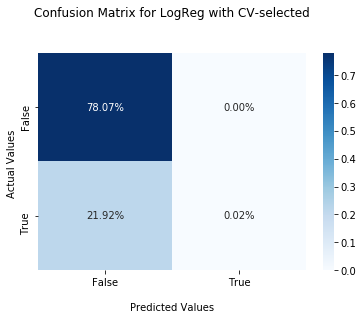

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


No Predictive value: ROC AUC=0.500
Logistic with CV: ROC AUC=0.630


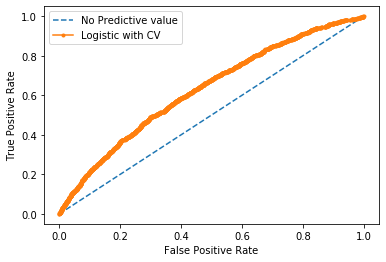

In [19]:
## Building model ( With the chosen 10 variables)
logreg = LogisticRegression()
logreg_fit=logreg.fit(new_X_train, y_train)
predicted = cross_val_predict(logreg,new_X_test, y_test, cv=10)
print(classification_report(y_test, predicted))
print(confusion_matrix(predicted, y_test))
print('\nAccuracy Score for Logistics Regression (with CV-selected): ',accuracy_score(y_test, predicted)) # testing
print('\nTesting MSE for Logistics Regression (with CV-selected): ', mean_squared_error(y_test,predicted))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,predicted)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for LogReg with CV-selected\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC 
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = cross_val_predict(logreg,new_X_test, y_test, cv=10,method='predict_proba')
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Logistic with CV: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic with CV')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### -----------------------------------------------------------  2) SVM --------------------------------------------------------------------------

In [28]:
from sklearn.svm import SVC

#### ----------------------------------------------------------------- Original ----------------------------------------------------------------------------------

#### 2.1 Without 10-fold CV 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.67      0.34      0.45      1316

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

[[4464  868]
 [ 220  448]]

Accuracy Score for SVM:  0.8186666666666667

Testing MSE for SVM (without CV):  0.18133333333333335


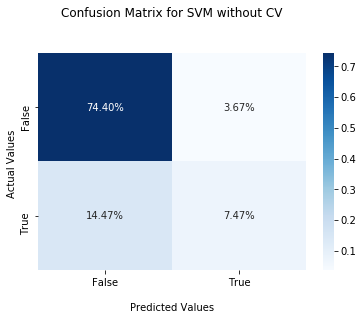

No Predictive value: ROC AUC=0.500
SVM without CV: ROC AUC=0.719


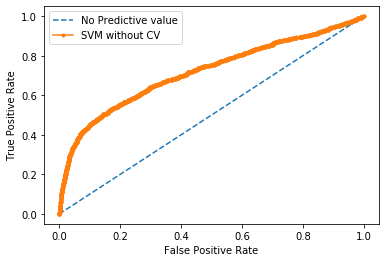

In [30]:
# Building
SVM=SVC(gamma='auto',probability=True)
SVM_fit=SVM.fit(scaled_x_train, y_train)
y_predict_test=SVM_fit.predict(scaled_x_test) ######## Change
print(classification_report(y_test, y_predict_test)) ######## Change
print(confusion_matrix(y_predict_test, y_test)) ######## Change
print('\nAccuracy Score for SVM: ',accuracy_score(y_test, y_predict_test)) ######## Change
print('\nTesting MSE for SVM (without CV): ', mean_squared_error(y_test,y_predict_test))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_predict_test)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for SVM without CV\n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = SVM_fit.predict_proba(scaled_x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('SVM without CV: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM without CV')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### 2.2 With 10-fold CV 

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4684
           1       0.64      0.32      0.42      1316

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.66      6000
weighted avg       0.79      0.81      0.79      6000

[[4453  899]
 [ 231  417]]

Accuracy Score for SVM:  0.8116666666666666

Testing MSE for SVM (with CV):  0.18833333333333332


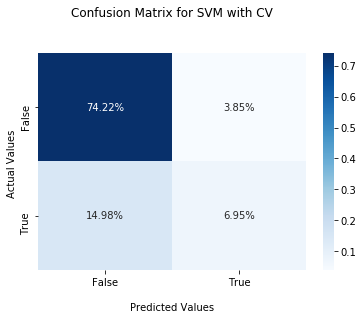

No Predictive value: ROC AUC=0.500
SVM with CV: ROC AUC=0.702


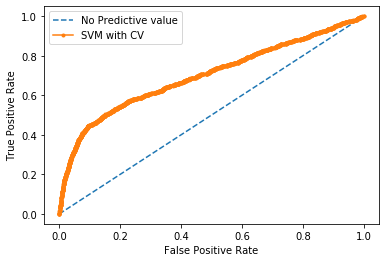

In [32]:
# Building (with CV)
predicted = cross_val_predict(SVM_fit,scaled_x_test, y_test, cv=10)
print(classification_report(y_test, predicted))
print(confusion_matrix(predicted, y_test))
print('\nAccuracy Score for SVM: ',accuracy_score(y_test, predicted)) # testing
print('\nTesting MSE for SVM (with CV): ', mean_squared_error(y_test,predicted))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,predicted)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for SVM with CV\n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC [CV]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = cross_val_predict(SVM_fit,scaled_x_test, y_test, cv=10,method='predict_proba')
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('SVM with CV: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM with CV')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


#### ------------------------------------------------------------------- Hyperparameter tuning ------------------------------------------------------------------

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Done   7 out of   9 | elapsed: 44.7min remaining: 12.8min
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed: 45.4min finished


svm_cv.best_params_ {'kernel': 'rbf', 'C': 1}
svm_cv.best_estimator_ SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Accuracy Score for tuned SVM:  0.8186666666666667

Testing MSE for tuned SVM:  0.18133333333333335


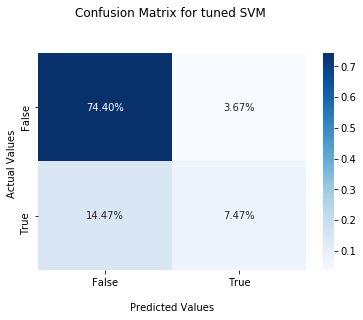

No Predictive value: ROC AUC=0.500
SVM with CV: ROC AUC=0.719


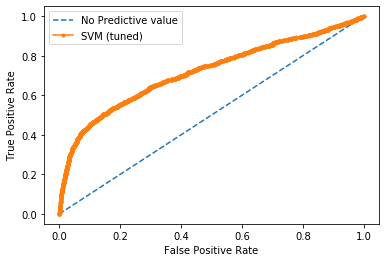

In [33]:
# Tuning
SVM=SVC(gamma='auto',probability=True)
svm_parameters = {'kernel':['rbf'], 'C':[0.1, 1, 10]}
svm_tuned = RandomizedSearchCV(SVM, svm_parameters, cv = 3, verbose=2, n_jobs = 4,refit=True)

# Building
svm_tuned.fit(scaled_x_train, y_train)
y_predict_tuned=svm_tuned.predict(scaled_x_test)
print('svm_cv.best_params_',svm_tuned.best_params_)
print('svm_cv.best_estimator_',svm_tuned.best_estimator_)
print('\nAccuracy Score for tuned SVM: ',accuracy_score(y_test, y_predict_tuned))
print('\nTesting MSE for tuned SVM: ', mean_squared_error(y_test,y_predict_tuned))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_predict_tuned)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for tuned SVM \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = svm_tuned.predict_proba(scaled_x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('SVM with CV: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM (tuned)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


## 3)Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

#### ----------------------------------------------------------------- Original ----------------------------------------------------------------------------------

#### 3.1 Without 10-fold CV  

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4684
           1       0.37      0.40      0.38      1316

    accuracy                           0.72      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.72      0.72      6000

[[3775  793]
 [ 909  523]]

Accuracy Score for Decision Tree (w/o CV):  0.7163333333333334

Testing MSE for Decision Tree (w/o CV):  0.2836666666666667


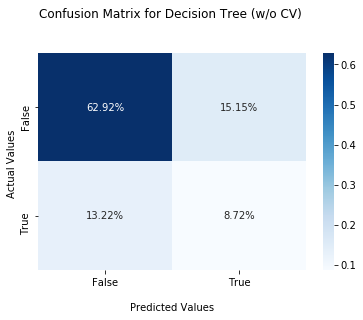

No Predictive value: ROC AUC=0.500
Decision Tree (w/o CV): ROC AUC=0.602


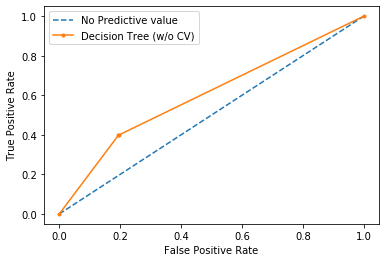

In [23]:
# Building
DecTree = DecisionTreeClassifier(random_state=0)
DecTree_fit=DecTree.fit(X_train, y_train)
y_predict_test=DecTree_fit.predict(X_test)
print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_predict_test, y_test))
print('\nAccuracy Score for Decision Tree (w/o CV): ',accuracy_score(y_test, y_predict_test)) 
print('\nTesting MSE for Decision Tree (w/o CV): ', mean_squared_error(y_test,y_predict_test))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_predict_test)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for Decision Tree (w/o CV) \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = DecTree_fit.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree (w/o CV): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree (w/o CV)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


#### 3.2 With 10-fold CV  

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4684
           1       0.38      0.41      0.39      1316

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000

[[3806  783]
 [ 878  533]]

Accuracy Score for Decision Tree (with CV):  0.7231666666666666

Testing MSE for Decision Tree (with CV):  0.2768333333333333


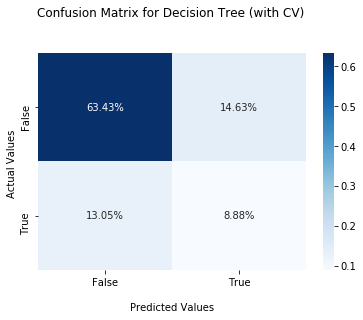

No Predictive value: ROC AUC=0.500
Decision Tree (with CV): ROC AUC=0.609


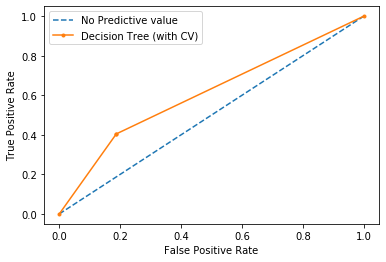

In [40]:
# Building
DecTree = DecisionTreeClassifier(random_state=0)
DecTree_fit=DecTree.fit(X_train, y_train)
predicted = cross_val_predict(DecTree_fit,X_test, y_test, cv=10)
print(classification_report(y_test, predicted))
print(confusion_matrix(predicted, y_test))
print('\nAccuracy Score for Decision Tree (with CV): ',accuracy_score(y_test, predicted))
print('\nTesting MSE for Decision Tree (with CV): ', mean_squared_error(y_test,predicted))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,predicted)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for Decision Tree (with CV) \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = cross_val_predict(DecTree_fit,X_test, y_test, cv=10,method='predict_proba')
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree (with CV): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree (with CV)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### ------------------------------------------------------------------- Hyperparameter tuning ------------------------------------------------------------------

### Tree Pruning

In [25]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [26]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0531356767346467


In [28]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

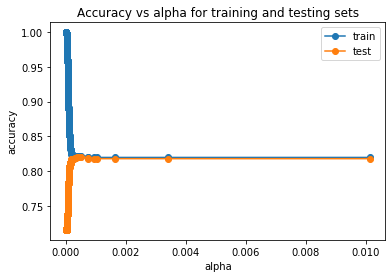

In [29]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Testing accuracy 0.8181666666666667


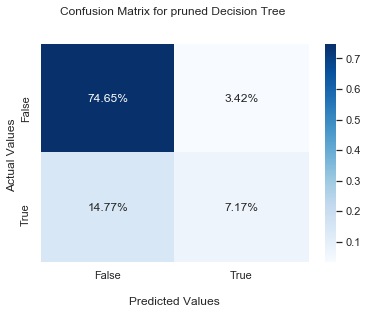

No Predictive value: ROC AUC=0.500
Decision Tree (tuned): ROC AUC=0.741


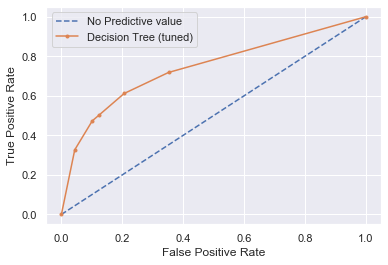

In [37]:
tree=DecisionTreeClassifier(ccp_alpha=0.001,random_state=40)
tree.fit(X_train,y_train)
y_test_pred=tree.predict(X_test)

print('Testing accuracy',accuracy_score(y_test,y_test_pred))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for pruned Decision Tree \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = tree.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree (tuned): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree (tuned)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### 3.3 With tuning

In [40]:
from scipy.stats import randint as sp_randint

DecTree_tuned.best_params_ {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 5}
DecTree_tuned.best_estimator_ DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Accuracy Score for tuned Decision Tree:  0.8181666666666667

Testing MSE for tuned Decision Tree:  0.18183333333333335


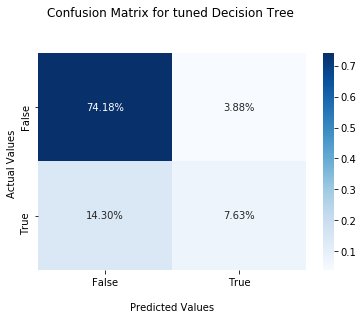

No Predictive value: ROC AUC=0.500
Decision Tree (tuned): ROC AUC=0.761


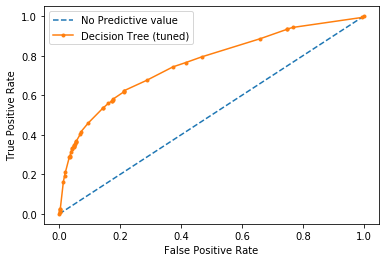

In [43]:
# Building
params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

# Instantiate the RandomizedSearchCV object: tree_cv
DecTree_tuned = RandomizedSearchCV(DecTree, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 100,n_jobs = -1)
DecTree_tuned.fit(X_train, y_train)
y_predict_test=DecTree_tuned.predict(X_test)
print('DecTree_tuned.best_params_',DecTree_tuned.best_params_)
print('DecTree_tuned.best_estimator_',DecTree_tuned.best_estimator_)
print('\nAccuracy Score for tuned Decision Tree: ',accuracy_score(y_test, y_predict_test))
print('\nTesting MSE for tuned Decision Tree: ', mean_squared_error(y_test,y_predict_test))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_predict_test)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for tuned Decision Tree \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = DecTree_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree (tuned): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree (tuned)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Feature Importance

In [66]:
importance = DecTree_tuned.feature_importances_
importance

NameError: name 'DecTree_tuned' is not defined

Text(0, 0.5, 'Importance')

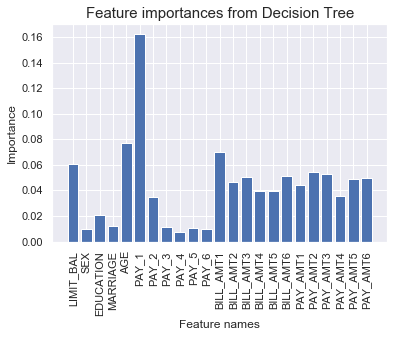

In [65]:
plt.bar([x for x in features], importance)
plt.xticks(rotation=90)
plt.title("Feature importances from Decision Tree",size=15)
plt.xlabel('Feature names')
plt.ylabel('Importance')

## 4) Random forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

##### ------------------------------------------------------------------- Original ------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4684
           1       0.65      0.37      0.47      1316

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[4414  823]
 [ 270  493]]

Accuracy Score for Random Forest:  0.8178333333333333

Testing MSE for Random Forest:  0.18216666666666667


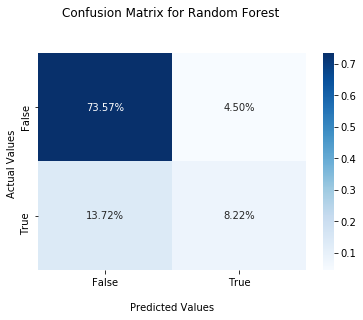

No Predictive value: ROC AUC=0.500
Random Forest: ROC AUC=0.761


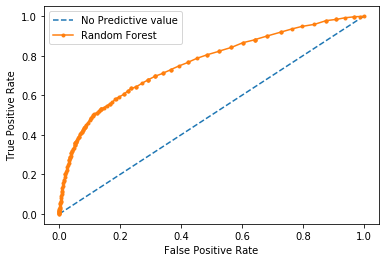

In [46]:
# Building
rf_clf=RandomForestClassifier(random_state=14)
rf_clf_fit=rf_clf.fit(X_train, y_train)
y_predict_test=rf_clf_fit.predict(X_test)

print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_predict_test, y_test))
print('\nAccuracy Score for Random Forest: ',accuracy_score(y_test, y_predict_test)) # tes
print('\nTesting MSE for Random Forest: ', mean_squared_error(y_test,y_predict_test))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_predict_test)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for Random Forest \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = rf_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

##### ----------------------------------------------------------- Hyperparameter tuning ------------------------------------------------------------------

In [42]:
rf_clf=RandomForestClassifier(random_state=14)
rf_clf_fit=rf_clf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.67      0.37      0.47      1316

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[4448  833]
 [ 236  483]]
RandomForest_tuned.best_params_ {'criterion': 'entropy', 'max_depth': 9, 'max_features': 7, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 177}
RandomForest_tuned.best_estimator_ RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=177,
                       n_jobs=Non

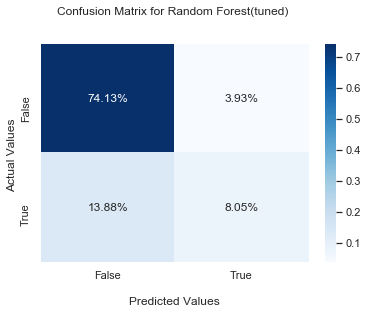

No Predictive value: ROC AUC=0.500
Random Forest(tuned): ROC AUC=0.778


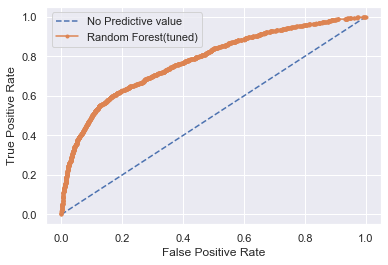

In [43]:
params = {'n_estimators' : sp_randint(50,200),
              'max_features' : sp_randint(1,24),'max_depth': sp_randint(2,10),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,20),
             'criterion':['gini','entropy']}



# Instantiate the RandomizedSearchCV object
rsearch_rfc = RandomizedSearchCV(rf_clf, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 200,random_state = 42,n_jobs = -1,return_train_score = True)

# Building
rsearch_rfc.fit(X_train, y_train)
y_predict_test=rsearch_rfc.predict(X_test)
print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_predict_test, y_test))
print('RandomForest_tuned.best_params_',rsearch_rfc.best_params_)
print('RandomForest_tuned.best_estimator_',rsearch_rfc.best_estimator_)
print('\nAccuracy Score for Random Forest (tuned): ',accuracy_score(y_test, y_predict_test)) # tes
print('\nTesting MSE for Random Forest(tuned): ', mean_squared_error(y_test,y_predict_test))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_predict_test)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for Random Forest(tuned) \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = rsearch_rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('Random Forest(tuned): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest(tuned)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


##### ----------------------------------------------------------- Feature importance  ------------------------------------------------------------------

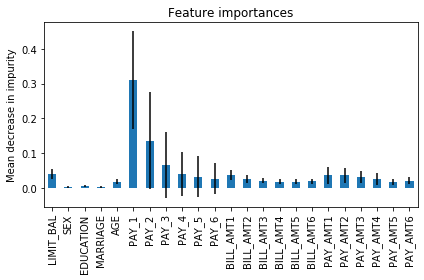

In [54]:
rf_tuned=RandomForestClassifier(n_estimators=177,max_features=7,max_depth=9,
             min_samples_leaf=9,
             min_samples_split=2,
             criterion='entropy',random_state=14)
rf_tuned_fit=rf_tuned.fit(X_train, y_train)
importances=rf_tuned.feature_importances_
feature_names=list(df.columns[1:-1])
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf_tuned.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## XGBoost 

In [56]:
import xgboost as xgb

#### ------------------------------------- Original ---------------------------------------------------------------

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.67      0.37      0.48      1316

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[4439  829]
 [ 245  487]]

Accuracy Score for XGBoost:  0.821

Testing MSE for XGBoost:  0.179


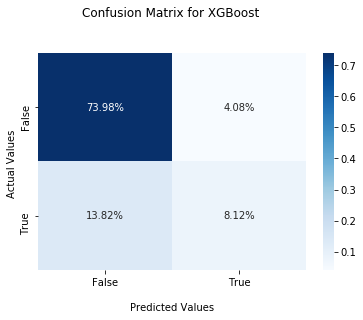

No Predictive value: ROC AUC=0.500
XGBoost: ROC AUC=0.776


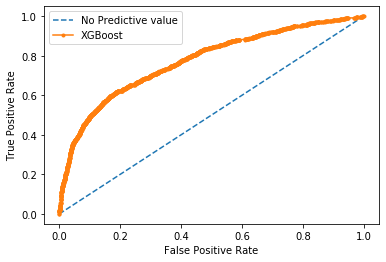

In [57]:
model_xgb = xgb.XGBClassifier(learning_rate = 0.1)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for XGBoost: ',accuracy_score(y_test, y_pred)) # tes
print('\nTesting MSE for XGBoost: ', mean_squared_error(y_test,y_pred))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for XGBoost \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### ------------------------------------- Hyperparameter tuning ---------------------------------------------------------------

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8 
[14:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.823, total=   1.1s
[CV] subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8 
[14:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.817, total=   1.1s
[CV] subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8 
[14:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.821, total=   1.1s
[CV] subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8 
[14:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.825, total=   1.1s
[CV] subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8 
[14:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, n_estimators=100, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.821, total=   1.1s
[CV] subsample=0.8, n_estimators=300, max_depth=7, gamma=5, colsample_bytree=0.8 
[14:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

[CV]  subsample=0.8, n_estimators=300, max_depth=7, gamma=1, colsample_bytree=0.8, score=0.822, total=   5.2s
[CV] subsample=0.8, n_estimators=300, max_depth=7, gamma=1, colsample_bytree=0.8 
[14:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, n_estimators=300, max_depth=7, gamma=1, colsample_bytree=0.8, score=0.815, total=   5.2s
[CV] subsample=0.8, n_estimators=300, max_depth=7, gamma=1, colsample_bytree=0.8 
[14:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

[CV]  subsample=0.8, n_estimators=100, max_depth=7, gamma=5, colsample_bytree=0.8, score=0.822, total=   1.9s
[CV] subsample=0.8, n_estimators=100, max_depth=7, gamma=5, colsample_bytree=0.8 
[14:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, n_estimators=100, max_depth=7, gamma=5, colsample_bytree=0.8, score=0.824, total=   1.9s
[CV] subsample=0.8, n_estimators=100, max_depth=7, gamma=5, colsample_bytree=0.8 
[14:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.67      0.36      0.47      1316

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[4455  844]
 [ 229  472]]
XGBoost_tuned.best_params_ {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.8}
XGBoost_tuned.best_estimator_ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', pr

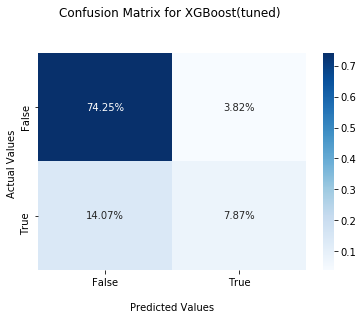

No Predictive value: ROC AUC=0.500
XGBoost(tuned): ROC AUC=0.773


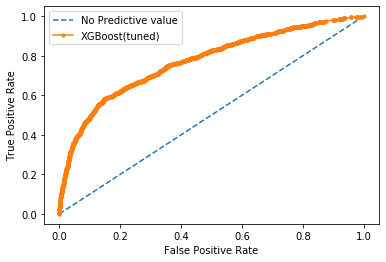

In [58]:
param_grid = {'gamma': [1, 5],   # regularization parameter
              'subsample': [0.8, 1.0], # % of rows taken to build each tree
              'colsample_bytree': [0.8, 1.0], # number of columns used by each tree
              'max_depth': [7, 5], # depth of each tree
              'n_estimators': [100, 300] #no. of trees
             }

model_xgb = xgb.XGBClassifier(objective='binary:logistic', learning_rate = 0.01)
model_xgb_tuned = RandomizedSearchCV(model_xgb, 
                    param_grid, 
                    refit = True, 
                    verbose = 4
                   )


# Building
model_xgb_tuned.fit(X_train, y_train)
y_predict_test=model_xgb_tuned.predict(X_test)
print(classification_report(y_test, y_predict_test))
print(confusion_matrix(y_predict_test, y_test))
print('XGBoost_tuned.best_params_',model_xgb_tuned.best_params_)
print('XGBoost_tuned.best_estimator_',model_xgb_tuned.best_estimator_)
print('\nAccuracy Score for XGBoost (tuned): ',accuracy_score(y_test, y_predict_test)) # tes
print('\nTesting MSE for XGBoost(tuned): ', mean_squared_error(y_test,y_predict_test))

# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_predict_test)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix for XGBoost(tuned) \n\n'); ######## Change
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model_xgb_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Predictive value: ROC AUC=%.3f' % (ns_auc))
print('XGBoost(tuned): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Predictive value')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost(tuned)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


##### ----------------------------------------------------------- Feature importance  ------------------------------------------------------------------

[16:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


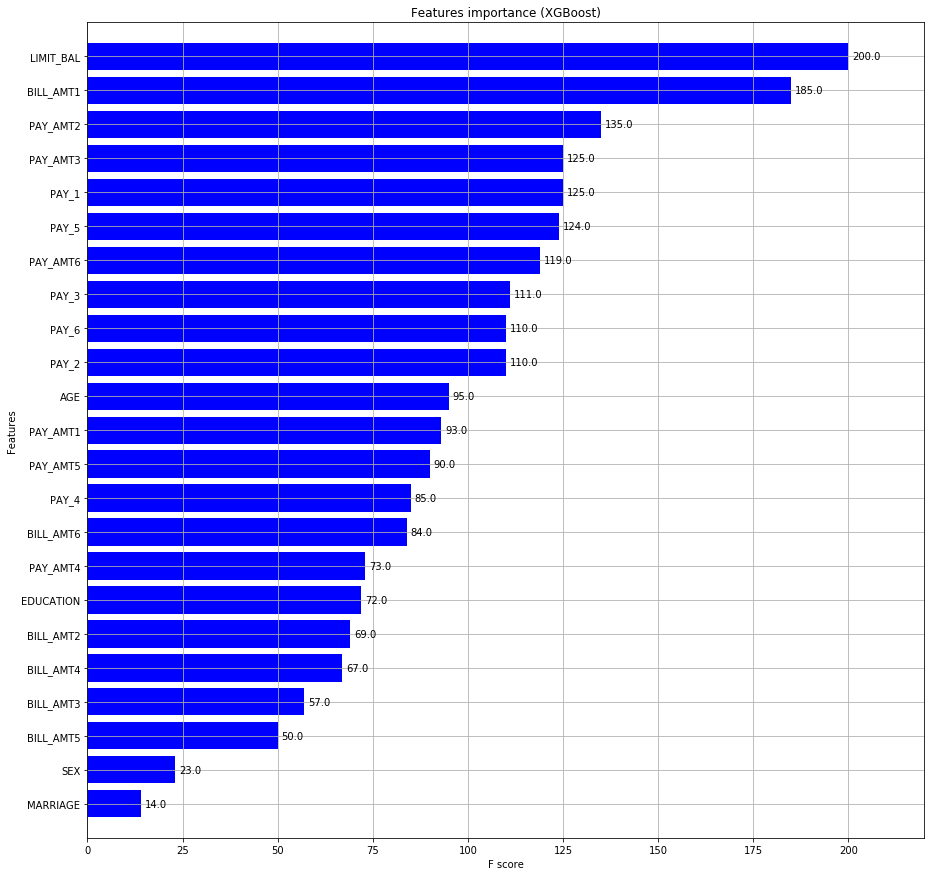

In [68]:
model_xgb_tuned = xgb.XGBClassifier(objective='binary:logistic', 
                                    learning_rate = 0.01,
                                    subsample= 0.8, 
                                    n_estimators= 100, 
                                    max_depth= 5, 
                                    gamma= 5, 
                                    colsample_bytree= 0.8)
model_xgb_tuned_fit=model_xgb_tuned.fit(X_train, y_train)
fig, (ax) = plt.subplots(ncols=1, figsize=(15,15))
xgb.plot_importance(model_xgb_tuned, height=0.8, title="Features importance (XGBoost)", ax=ax, color="blue") 
plt.show()